In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

sys.path.append(os.path.abspath("../src"))  

my_analysis_path = '/home/gus/Documents/REPOS/tmt-analysis/data/hand_analysis/2025-05-05_13-05-32/analysis.csv'
metadata_path = '../data/metadata/metadata.csv'

df = pd.read_csv(my_analysis_path)

In [2]:
def clean_metadata(path_to_metadata):
    df = (
    (
        pd.read_csv(path_to_metadata)
        .rename(
            columns={
                "Anteojos o lentes de contacto": "glasses",
                "años de escolaridad": "years of education",
                "MMSE / 30": "MMSE",
                "Reloj / 3": "clock_drawing_test",
                "Nro de participante": "suj",
                "Género": "sex",
                "Edad": "age",
                "Grupo": "group",
                "TMT A papel PB": "tmt_a_raw",
                "TMT B papel PB": "tmt_b_raw",
                "Digit Symbol pb": "digit_symbol_raw",
                "Span directo pb": "forward_digit_pan",
                "span inverso pb": "backward_digit_pan",
                "reloj": "clock_drawing_test",
            }
        )
        .replace("Caso ?", "Caso")
    )
    .drop([0, 1])
    .reset_index(drop=True) 
    )  # 0 and 1 are summary


    df.columns = [x.lower() for x in df.columns]
    print(df.columns)
    df = df.replace(",", ".", regex=True)
    df["sex"] = df["sex"].replace({"F": 1, "M": 0}).astype("Int64")
    df["group"] = df["group"].str.lower()
    df = df.replace("caso", "mci")
    z_score_cols = [col for col in df.columns if col[-1] == "z"]
    df = df.drop(z_score_cols, axis=1).reset_index(drop=True)
    df = df.replace("Suspendido", 300).replace("No logra", 300)  # 300 seconds it is the max time based on the literature
    df['digit_symbol_raw'] = df['digit_symbol_raw'].replace('no se lo administraron', np.nan).astype(float)
    df = df.astype({"tmt_a_raw": float, "tmt_b_raw": float})
    df["suj"] = df["suj"].astype(int)
    return df

In [3]:
df_metadata = clean_metadata(metadata_path)
df_metadata

Index(['suj', 'group', 'clasificación de caso',
       'comentario (tipo de caso o criterio de exclusión)', 'id participante',
       'fecha', 'hora', 'neuropsicol.', 'eyetracker', 'sex', 'age', 'glasses',
       'observaciones', 'mmse', 'mmse fallas', 'tmt_a_raw', 'tmt a (papel) z',
       'tmt_b_raw', 'tmt b papel errores', 'tmt b (papel) z',
       'digit_symbol_raw', 'digit - symbol z', 'forward_digit_pan',
       'span directo z', 'backward_digit_pan', 'span inverso z',
       'clock_drawing_test', 'años de escolaridad'],
      dtype='object')


,suj,group,clasificación de caso,comentario (tipo de caso o criterio de exclusión),id participante,fecha,hora,neuropsicol.,eyetracker,sex,age,glasses,observaciones,mmse,mmse fallas,tmt_a_raw,tmt_b_raw,tmt b papel errores,digit_symbol_raw,forward_digit_pan,backward_digit_pan,clock_drawing_test,años de escolaridad
0,1,control,NaN,*,946462,22/1/2024,14:30,Betsabé,Gus,1,52,-,No trajo los lentes para ver de cerca,30.0,--,32.00,47.00,NaN,63.0,6.0,4.0,2.0,18.0
1,2,control,NaN,*,2684844,22/1/2024,15:00,Betsabé,Gus,0,78,Anteojos,NaN,28.0,-2 recuerdo,47.00,82.00,NaN,36.0,6.0,5.0,3.0,16.0
2,3,mci,DCL MD no amnesico,NaN,6305,22/1/2024,15:30,Laura,Gus,1,68,Anteojos,NaN,28.0,-2 atención,65.00,107.00,NaN,45.0,5.0,4.0,3.0,12.0
3,4,mci,DCL MD no amnesico,NaN,2060316,22/1/2024,16:00,Laura,Gus,1,80,Anteojos,NaN,28.0,-1 atención. -1 recuerdo,55.00,109.00,NaN,38.0,5.0,4.0,3.0,15.0
4,5,mci,DCL MD no amnesico,NaN,4744,22/1/2024,16:30,Betsabé,Gus,1,87,Anteojos,NaN,25.0,-2 OT. -1 At. -1 rec. -1VC,63.00,180.09,(2 errores),32.0,5.0,3.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,mci,DCL no amnesico,NaN,2302423,7/10/2024,13hs,Betsabe,Alejandro,1,75,anteojos,NaN,27.0,1 atenc. 2 recuerdo,38.90,93.70,2 errores,28.0,7.0,4.0,3.0,12.0
96,98,mci,DCL no amnesico,NaN,3104154,21/10/2024,13hs,Betsabe,Alejandro,1,70,anteojos,NaN,29.0,1 recuerdo,40.36,140.00,4 errores,46.0,5.0,4.0,3.0,15.0
97,99,mci,DCL no amnesico,NaN,2486596,21/10/2024,1:15:00 p.m.,Betsabe,Alejandro,1,71,NaN,NaN,29.0,1 recuerdo,51.80,78.30,NaN,42.0,6.0,6.0,3.0,18.0
98,100,control,NaN,NaN,22945,11/11/2024,13hs,Betsabe,Alejandro,0,76,anteojos,NaN,29.0,1 VC,50.42,69.40,-,40.0,8.0,5.0,3.0,18.0


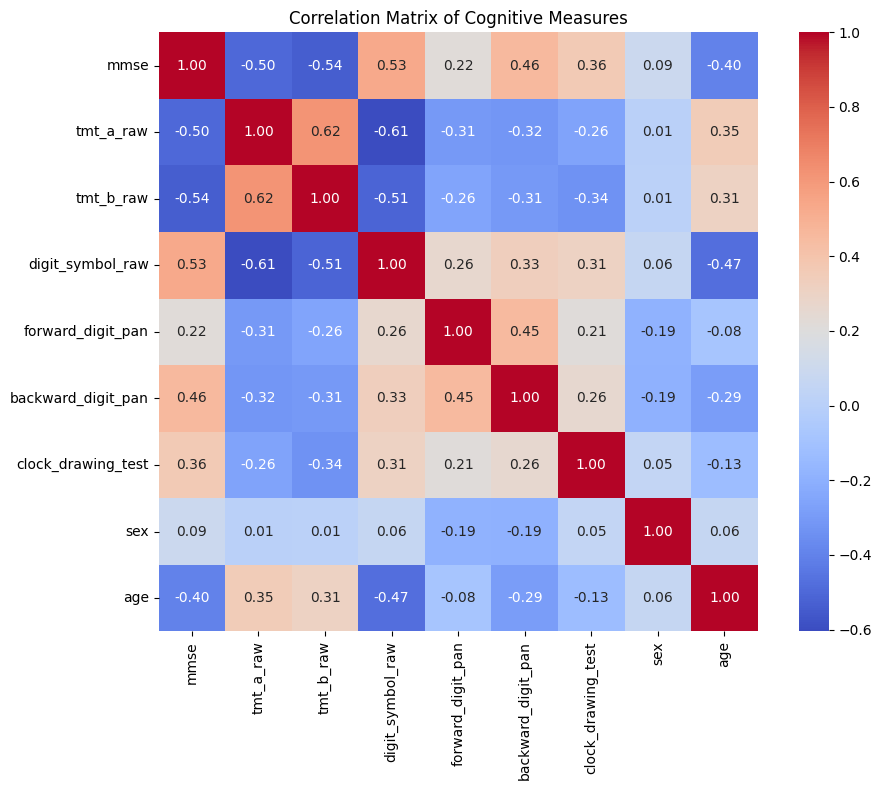

In [4]:
# Clean and convert appropriate columns to numeric
cognitive_columns = ['mmse', 'tmt_a_raw',
                    'tmt_b_raw', 'digit_symbol_raw', 'forward_digit_pan',
                    'backward_digit_pan', 'clock_drawing_test']

demographic_colums = ['sex', 'age']

group_column = ['group']

# Compute correlation matrix
corr_matrix = df_metadata[cognitive_columns + demographic_colums].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Cognitive Measures")
plt.tight_layout()
plt.show()

In [5]:
df_metadata_cognitive = df_metadata[['suj','group'] + demographic_colums + cognitive_columns].copy()

In [6]:
df_all = df.merge(df_metadata_cognitive, left_on='subject_id', right_on='suj').rename(columns={"sex_y": "sex", "age_y": "age", "group_y": "group"})
keep_cols = [i for i in df_all.columns if "_x" not in i]
df_all = df_all[keep_cols]

In [7]:
# ['suj', 'group', 'sex']
df_all.columns

Index(['subject_id', 'trial_id', 'trial_type', 'is_valid',
       'trial_order_of_appearance', 'speed_threshold', 'total_distance', 'rt',
       'correct_targets_touches', 'wrong_targets_touches', 'mean_speed',
       'std_speed', 'peak_speed', 'mean_acceleration', 'std_acceleration',
       'peak_acceleration', 'mean_abs_acceleration', 'std_abs_acceleration',
       'peak_abs_acceleration', 'mean_negative_acceleration',
       'std_negative_acceleration', 'peak_negative_acceleration',
       'hesitation_time', 'travel_time', 'search_time', 'hesitation_distance',
       'travel_distance', 'search_distance', 'hesitation_avg_speed',
       'travel_avg_speed', 'search_avg_speed', 'state_transitions',
       'hesitation_ratio', 'total_hesitations', 'average_duration',
       'max_duration', 'hesitation_periods', 'number_of_crosses',
       'invalid_cause', 'suj', 'group', 'sex', 'age', 'mmse', 'tmt_a_raw',
       'tmt_b_raw', 'digit_symbol_raw', 'forward_digit_pan',
       'backward_digit_

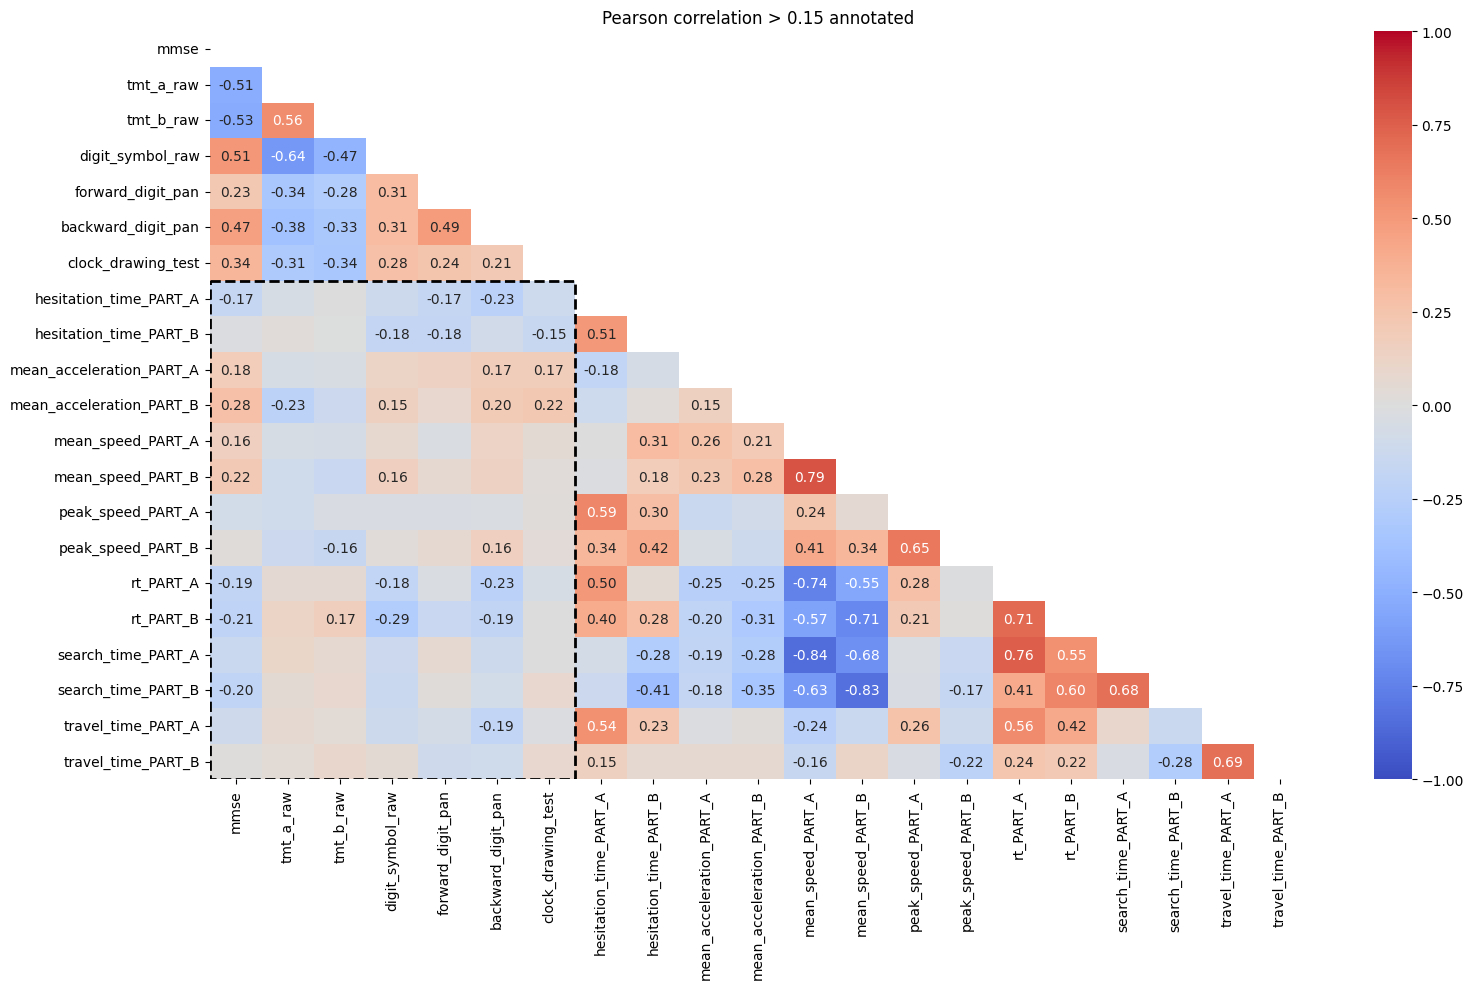

In [42]:
df = df_all.copy()

# Step 1: Filter valid rows
df_valid = df[df["is_valid"]]

digital_tmt_vars = [
    "rt", "mean_speed", "mean_acceleration", "search_time",
    "travel_time", "peak_speed", "hesitation_time"
]

other_test_vars = ['mmse', 'tmt_a_raw', 'tmt_b_raw', 'digit_symbol_raw', 'forward_digit_pan', 'backward_digit_pan', 'clock_drawing_test']

df_digital_tmt = df_valid.pivot_table(index='subject_id', columns="trial_type", values=digital_tmt_vars)

df_digital_tmt.columns = [f"{var}_{ttype}" for var, ttype in df_digital_tmt.columns]
df_digital_tmt

df_other_tasks = df_valid.groupby("subject_id")[other_test_vars].mean()

df_all_tasks = df_other_tasks.join(df_digital_tmt)
corr_matrix = df_all_tasks.corr()

thresh = 0.15
# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create annotations only if abs(value) > 0.4
annot_vals = corr_matrix.applymap(lambda x: f"{x:.2f}" if abs(x) > thresh else "")

# Plot lower triangle
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, mask=mask, annot=annot_vals, fmt="", cmap="coolwarm", vmin=-1, vmax=1)
plt.title(f"Pearson correlation > {thresh} annotated")



# Add rectangle to highlight cross-group correlations
digital_tmt_size = len(digital_tmt_vars)
other_test_size = len(other_test_vars) * 2

# Draw rectangle around the bottom left (trajectory x cognitive)
rect_start_x = 0
rect_start_y = digital_tmt_size
rect_width = digital_tmt_size
rect_height = other_test_size

# Rectangle parameters: (x, y, width, height)
plt.gca().add_patch(plt.Rectangle(
    (rect_start_x, rect_start_y),  # (x, y)
    rect_width,                    # width
    rect_height,                   # height
    fill=False, edgecolor='black', lw=2, linestyle='--'
))

plt.tight_layout()
plt.show()
